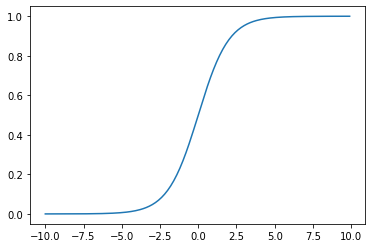

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-10,10,0.1)
plt.plot(x,sigmoid(x))


<p>The logistic regression is used to make classicfication. In this post, we will be investigating the two-level case meaning that we will have only two possible outputs: 0 or 1. For a discrete set of target we have
    $$y \in \{0,1\}$$
In real life examples, this could mean many things. For example: having the size of the tumors as a feature, we may decide if the tumor is benign or not. Then our target is two-level: benign, or not.</p>
<p>We want the hypothesis to be in the interval,
    $$ 0 \leq h(x) \leq 1$$ The following convention, although it is not used commonly as a first choice today, is the definition of an hypothesis, as a sigmoid function.
    $$ h(x) = \sigma(\theta^T x), \sigma(x) = \frac{1}{1+e^{-x}}$$
In this formalism, we will have the hypothesis function interpreted as the estimated probability that y=1 on feature x. 
    $$h(x) = P(y=1|x;\theta)$$ </p>
<p class="title is-4">Decision Boundary</p>
<p>According to the above definition, we will predict y=1 whenever 
    $$h(x)\geq 0.5$$ But substituting for sigmoid function in the hypothesis, we then get
    $$ y=1 \rightarrow \theta^T x \geq 0$$ Similarly,
    $$ y=0 \rightarrow \theta^T x \leq 0$$ Note that at zero we don't have a prediction. Then by finding these relations, we can plot the decision boundary. It can be a line, or a non-linear shape. For instance for a polynomial set of features, we will get a polynomial inequality relation therefore a non-linear decision boundary such as an elipse or a circle.</p>
<p class="title is-4">Cost Function</p>
<p>The training set will be
    $$T = \{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\dots, (x^{(m)},y^{(m)})\}$$ The size of the training set is m. We similarly define 
    $$x = \begin{bmatrix} 
                    1  \\
                    x_1 \\
                    x_2 \\
                    \dots \\
                    x_n
                    \end{bmatrix}, \theta = \begin{bmatrix} 
                    \theta_0  \\
                    \theta_1 \\
                    \theta_2 \\
                    \dots \\
                    \theta_n
                    \end{bmatrix}, y=\{0,1\}$$ and we also have 
    $$ h(x) = \sigma(\theta^T x)$$ Now we will use the conventional cost function, note that there may be found other suitable cost functions. We will have 
    $$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} error(h(x^{(i)}),y^{(i)})$$ with the error function
    $$ error(h(x),y) = -yln(h(x))-(1-y)ln(1-h(x))$$ Notice that this is in fact the entropy of a discrete two-level system found by using the micro-canonical partition function in statistical physics.</p>
<p>The same procedure of gradient descent algorithm will be used here. Yet as it is a little too tedious to take the derivative, instead of confusing the reader, I will give the derivative:
    $$ \theta_j := \theta_j - \frac{\alpha}{m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})x_j^{(i)}$$ and we repeat this until convergence. Note that as it may seem exactly similar to the gradient descent procedure of multi-feature linear regression, it is not the same at all as the hypothesis function is different. </p>
<p class="title is-4">Remark</p>
<p>If we have a problem of overfitting, we can reduce the number of features or we can use regularization, which is the next topic.</p>

In [180]:
data = pd.read_csv("logistic_regression.txt")
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


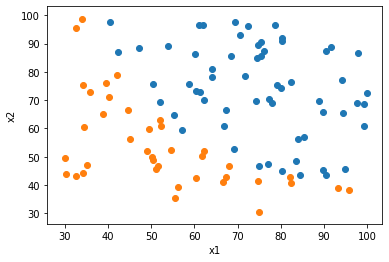

In [181]:
import matplotlib.patches as mpatches

x1 = data.iloc[:,0] 
x2 = data.iloc[:,1] 
y = data.iloc[:,2] 

x1 = x1[:,np.newaxis]
x2 = x2[:,np.newaxis]
y = y[:,np.newaxis]


X = np.column_stack((np.ones(x1.size),x1,x2))

index = np.zeros(y.size)
nindex = np.zeros(y.size)

for i in np.arange(y.size):
    if y[i]==1:
        index[i]= i
    else:
        nindex[i]=i
        
index = index[index != 0]
nindex = nindex[nindex != 0]

index = index[:,np.newaxis]
nindex = nindex[:,np.newaxis]

index = index.astype(int)
nindex = nindex.astype(int)

pos_x1 = np.take(x1,index)
pos_x2 = np.take(x2,index)

neg_x1 = np.take(x1,nindex)
neg_x2 = np.take(x2,nindex)

colors = ("red", "green")
groups = ("Positive", "Negative")

fig = plt.figure()
plt.scatter(pos_x1, pos_x2)
plt.scatter(neg_x1,neg_x2)
plt.xlabel('x1')
plt.ylabel("x2")
plt.savefig("image_logistic_data.png")

In [182]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def h(theta,X):
    return sigmoid(np.matmul(X,theta))

# h(x) = theta_0 + theta_1*x_1 + theta_2*x_2> 0

# theta -> 3x1
# X -> 100x3
# y -> 100x1
# X*theta is allowed

theta = np.array([-25,0.2,0.2])
theta = theta[:,np.newaxis]
m = x1.size


def gradient_descent(theta,X,y,alpha):
    for i in np.arange(10000):
        Xthe = np.matmul(X,theta)
        temp = theta - (alpha/m)*np.matmul(X.T,(Xthe-y))
        theta = temp 
        #print(theta)
    return theta


In [183]:
gradient_descent(theta,X,y,0.0001)

array([[-24.10297917],
       [  0.17291136],
       [  0.1883413 ]])

<p>So this means that we have 
    $$ h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$$
        $$ x_2 = -\frac{\theta_0 + \theta_1 x_1}{\theta_2}$$ and this is a line. If we draw this line we can see the decision boundary of our problem. </p>

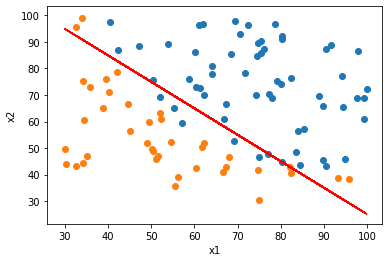

In [185]:
def dec_boun(theta,x_1):
    return -(theta[0]+theta[1]*x_1)/(theta[2])

fig = plt.figure()
plt.scatter(pos_x1, pos_x2)
plt.scatter(neg_x1,neg_x2)
plt.plot(x1,dec_boun(theta,x1),color="red")
plt.xlabel('x1')
plt.ylabel("x2")
plt.savefig("image_decision_boundary.png")

<p>This is the decision boundary. </p>